# Google Playstore EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://www.kaggle.com/datasets/lava18/google-play-store-apps")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,7/01/2018,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15/01/2018,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1/08/2018,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,8/06/2018,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,20/06/2018,1.1,4.4 and up


# Distribution of app ratings

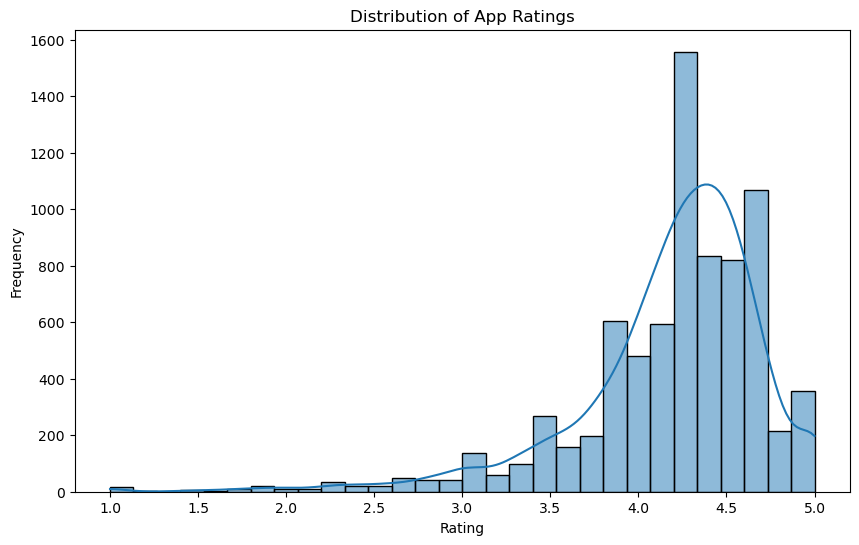

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'].dropna(), bins=30, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# What is the correlation between Reviews and Ratings?

In [6]:
correlation_reviews_ratings = df[['Reviews', 'Rating']].corr()
correlation_reviews_ratings

,Reviews,Rating
Reviews,1.000000,0.079823
Rating,0.079823,1.000000


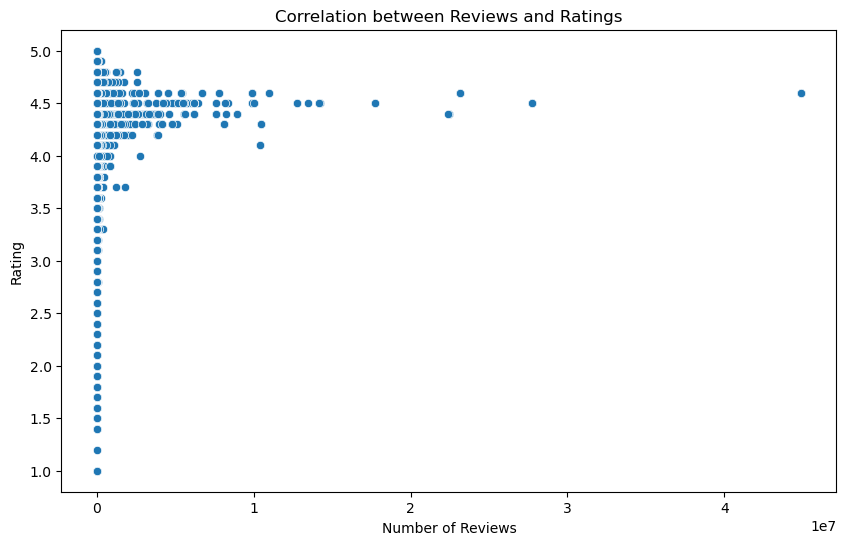

In [7]:
# Correlation between Reviews and Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reviews', y='Rating', data=df)
plt.title('Correlation between Reviews and Ratings')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.show()

# Distribution of app sizes

In [9]:
size_summary = df['Size'].describe()
size_summary

count    7729.000000
mean       22.957252
std        23.445831
min         0.000000
25%         5.300000
50%        14.000000
75%        33.000000
max       100.000000
Name: Size, dtype: float64

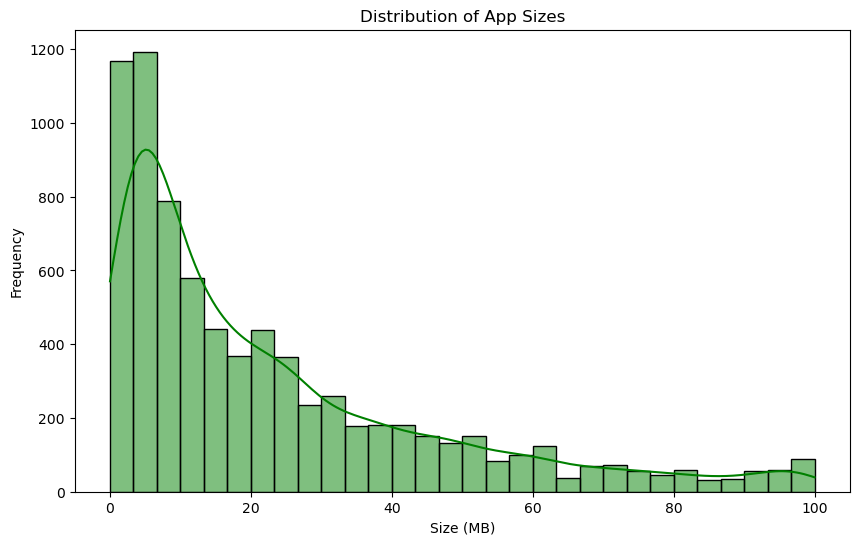

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Size'].dropna(), bins=30, kde=True, color='green')
plt.title('Distribution of App Sizes')
plt.xlabel('Size (MB)')
plt.ylabel('Frequency')
plt.show()

# Categories with the most number of apps

In [12]:
top_categories = df['Category'].value_counts().head(10)
top_categories

Category
FAMILY             1617
GAME                974
TOOLS               634
MEDICAL             324
LIFESTYLE           280
PERSONALIZATION     280
FINANCE             266
SPORTS              247
BUSINESS            246
PHOTOGRAPHY         236
Name: count, dtype: int64

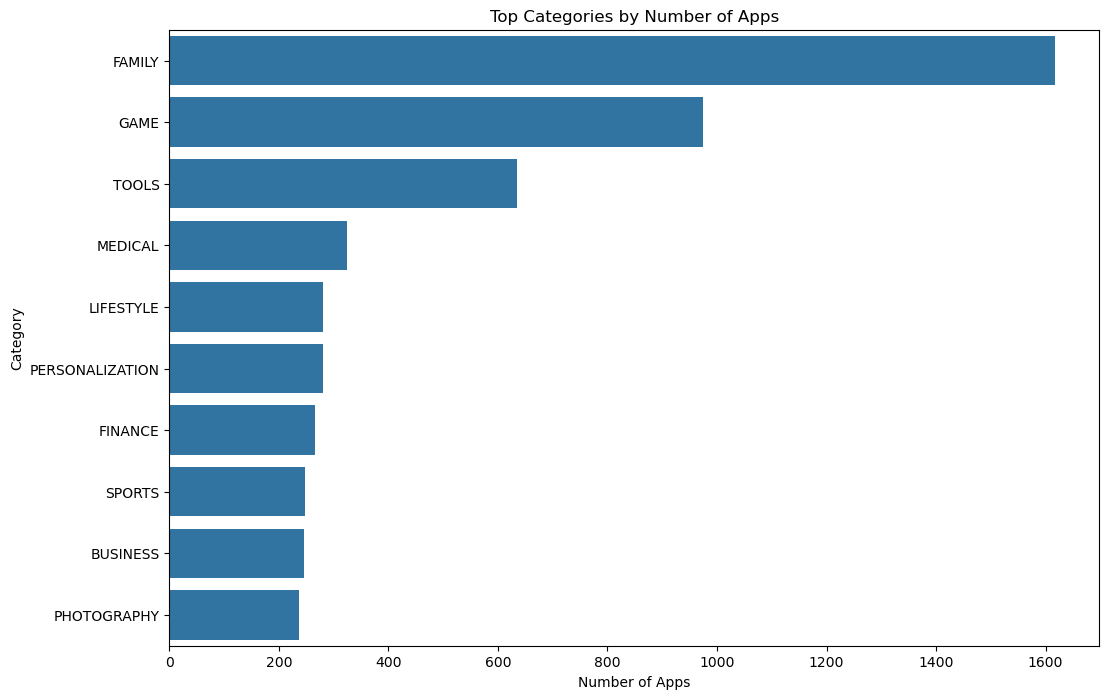

In [13]:
plt.figure(figsize=(12, 8))
top_categories = df['Category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top Categories by Number of Apps')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

# Distribution of Free vs Paid apps

In [15]:
free_vs_paid = df['Type'].value_counts()
free_vs_paid

Type
Free    7150
Paid     579
Name: count, dtype: int64

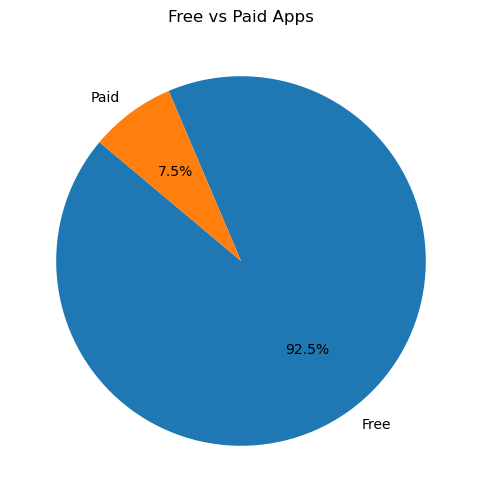

In [16]:
plt.figure(figsize=(8, 6))
plt.pie(free_vs_paid, labels=free_vs_paid.index, autopct='%1.1f%%', startangle=140)
plt.title('Free vs Paid Apps')
plt.show()

# Price distribution of paid apps

In [18]:
paid_apps = df[df['Price'] > 0]
price_summary = paid_apps['Price'].describe()
price_summary

count    579.000000
mean      15.052383
std       61.956552
min        0.990000
25%        1.865000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64

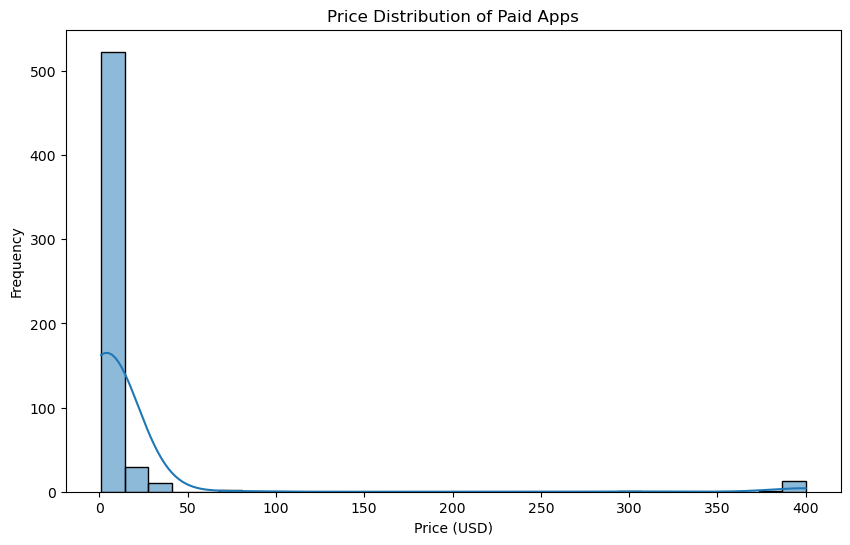

In [19]:
plt.figure(figsize=(10, 6))
paid_apps = df[df['Price'] > 0]
sns.histplot(paid_apps['Price'], bins=30, kde=True)
plt.title('Price Distribution of Paid Apps')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

# Most Common Content Ratings

In [21]:
content_ratings = df['Content Rating'].value_counts()
content_ratings

Content Rating
Everyone           6172
Teen                868
Mature 17+          368
Everyone 10+        318
Adults only 18+       2
Unrated               1
Name: count, dtype: int64

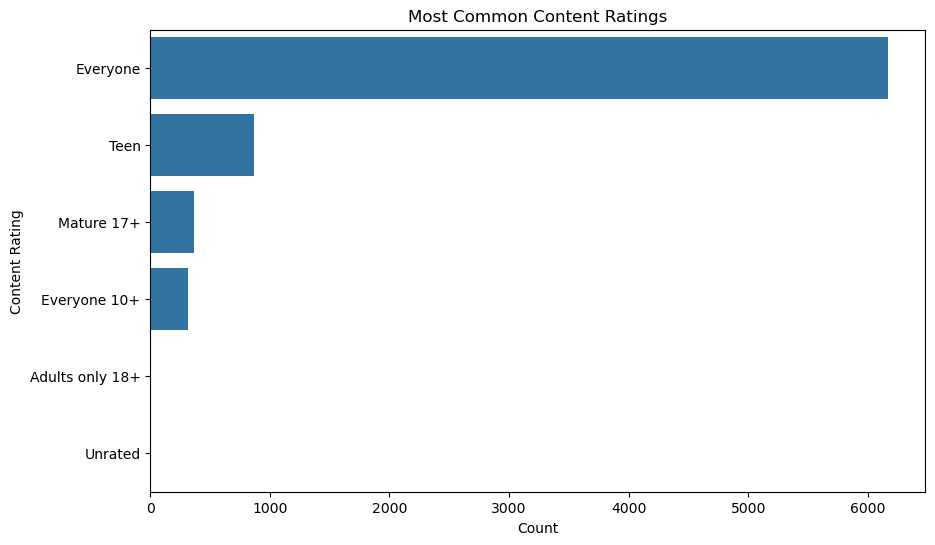

In [22]:
plt.figure(figsize=(10, 6))
content_ratings = df['Content Rating'].value_counts()
sns.barplot(x=content_ratings.values, y=content_ratings.index)
plt.title('Most Common Content Ratings')
plt.xlabel('Count')
plt.ylabel('Content Rating')
plt.show()

# Most popular app genres

In [24]:
top_genres = df['Genres'].value_counts().head(10)
print("Top Genres by Number of Apps")
top_genres.to_frame()

Top Genres by Number of Apps


,count
Genres,
Tools,634
Entertainment,448
Education,417
Medical,324
Action,322
Personalization,280
Lifestyle,279
Finance,266
Sports,261


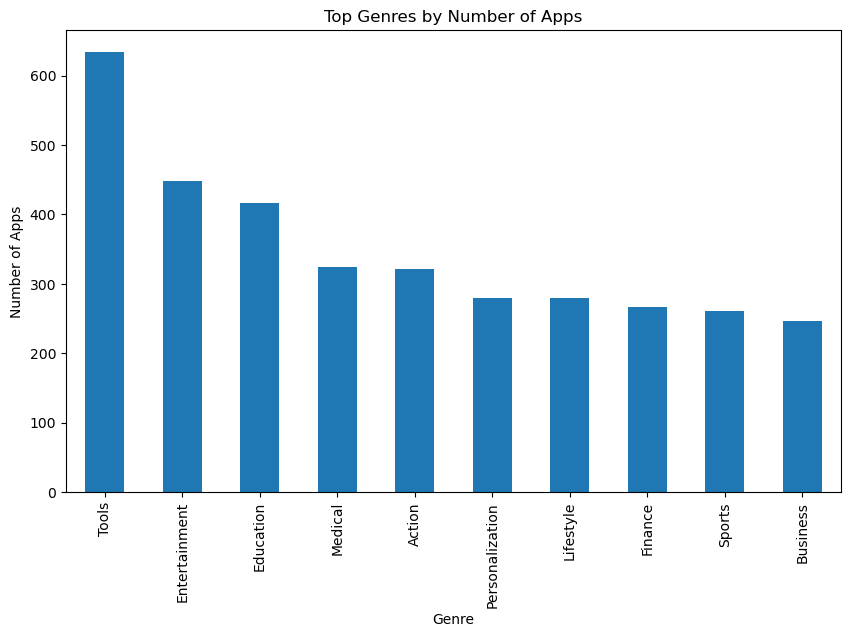

In [25]:
top_genres.plot(kind='bar', figsize=(10, 6))
plt.title('Top Genres by Number of Apps')
plt.xlabel('Genre')
plt.ylabel('Number of Apps')
plt.show()

# Average Rating by Category

In [27]:
avg_rating_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print("Average Rating by Category")
avg_rating_by_category.to_frame()

Average Rating by Category


,Rating
Category,
EVENTS,4.478947
EDUCATION,4.387273
ART_AND_DESIGN,4.361017
PARENTING,4.347727
PERSONALIZATION,4.324286
BOOKS_AND_REFERENCE,4.320139
BEAUTY,4.291892
GAME,4.269507
SOCIAL,4.257062


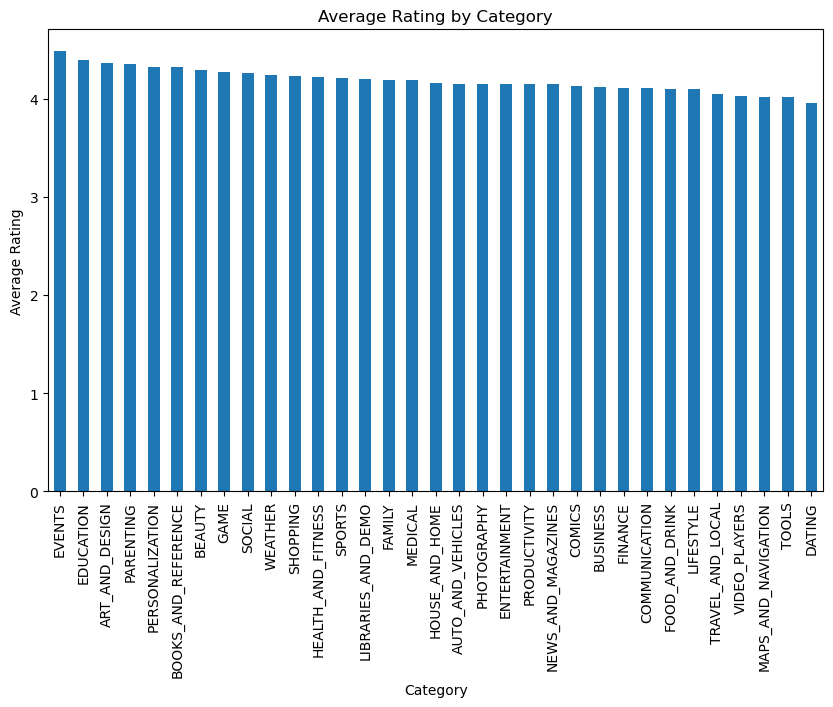

In [28]:
avg_rating_by_category.plot(kind='bar', figsize=(10, 6))
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.show()

# Number of Apps Updated Recently

In [30]:
recent_updates = df[df['Last Updated'] > '2023-08-10']
num_recent_updates = recent_updates.shape[0]
print(f"Number of Apps Updated in the Last Year: {num_recent_updates}")

Number of Apps Updated in the Last Year: 4657


In [31]:
recent_updates_by_category = recent_updates['Category'].value_counts()
print("Apps Updated in the Last Year by Category")
recent_updates_by_category.to_frame()

Apps Updated in the Last Year by Category


,count
Category,
FAMILY,983
GAME,577
TOOLS,389
PERSONALIZATION,177
MEDICAL,175
LIFESTYLE,172
FINANCE,155
SPORTS,147
PRODUCTIVITY,143


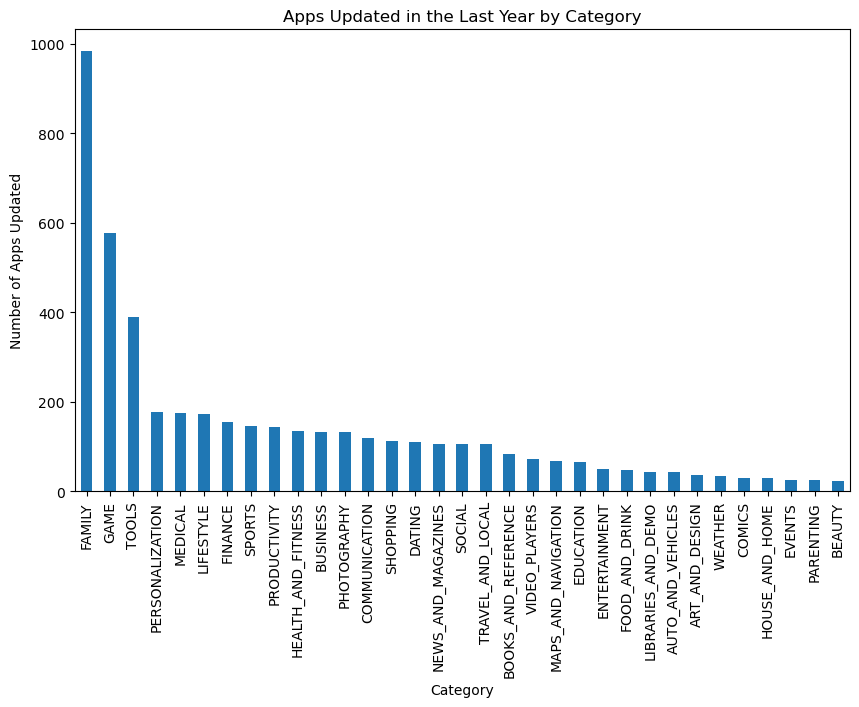

In [32]:
recent_updates_by_category.plot(kind='bar', figsize=(10, 6))
plt.title('Apps Updated in the Last Year by Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps Updated')
plt.show()

# Relationship between app size and installs

In [34]:
correlation_size_installs = df[['Size', 'Installs']].corr()
print("Correlation between App Size and Installs")
correlation_size_installs

Correlation between App Size and Installs


,Size,Installs
Size,1.000000,0.162759
Installs,0.162759,1.000000


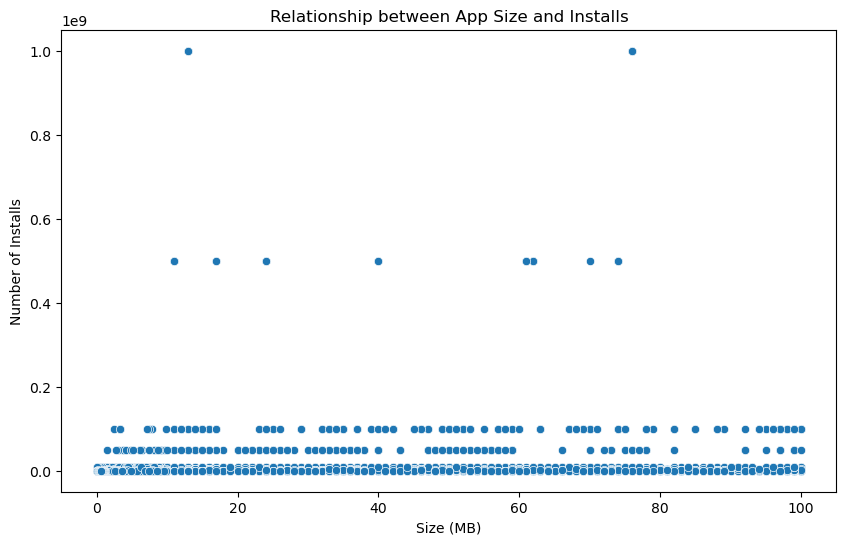

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Installs', data=df)
plt.title('Relationship between App Size and Installs')
plt.xlabel('Size (MB)')
plt.ylabel('Number of Installs')
plt.show()

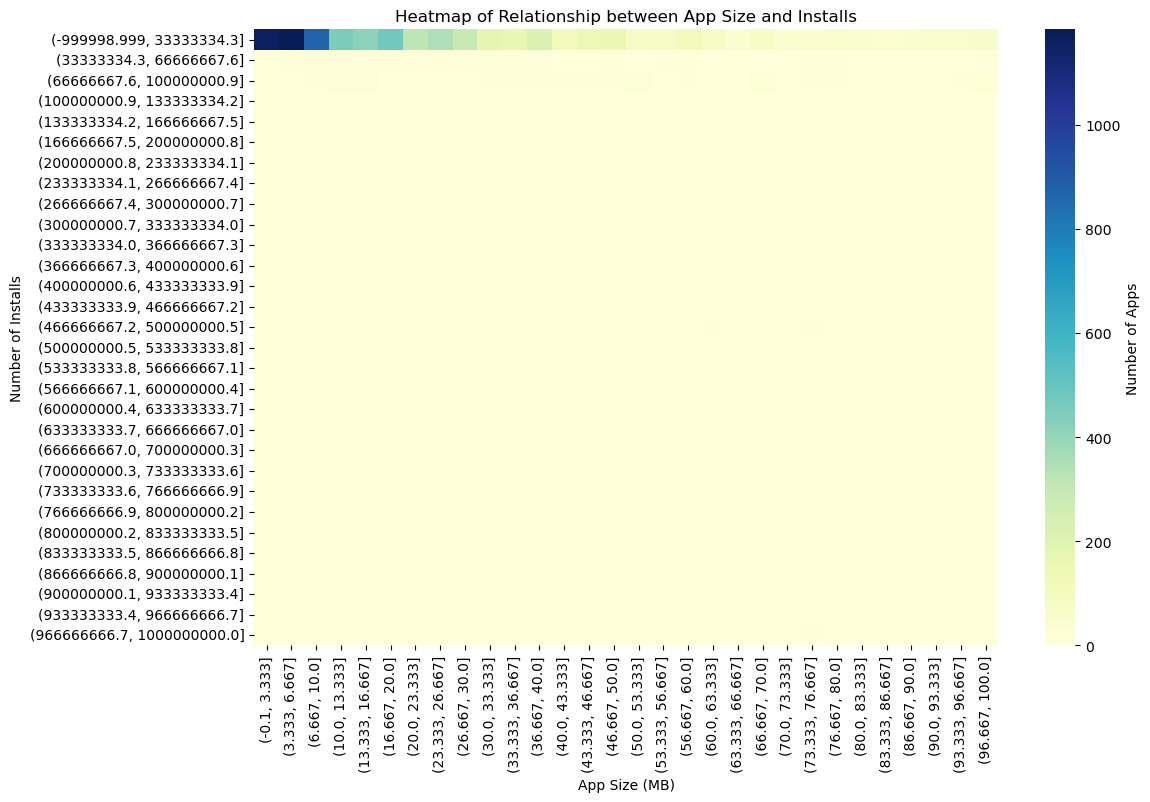

In [36]:
size_bins = pd.cut(df['Size'], bins=30)
installs_bins = pd.cut(df['Installs'], bins=30)
heatmap_data = pd.pivot_table(df, index=installs_bins, columns=size_bins, aggfunc='size', fill_value=0, observed=False)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Number of Apps'})
plt.title('Heatmap of Relationship between App Size and Installs')
plt.xlabel('App Size (MB)')
plt.ylabel('Number of Installs')
plt.show()

# Average Number of Installs by Content Rating

In [38]:
avg_installs_by_content_rating = df.groupby('Content Rating')['Installs'].mean().sort_values(ascending=False)
print("Average Number of Installs by Content Rating")
avg_installs_by_content_rating.to_frame()

Average Number of Installs by Content Rating


,Installs
Content Rating,
Everyone 10+,3.203473e+07
Teen,1.412229e+07
Everyone,6.682064e+06
Mature 17+,3.728867e+06
Adults only 18+,7.500000e+05
Unrated,5.000000e+04


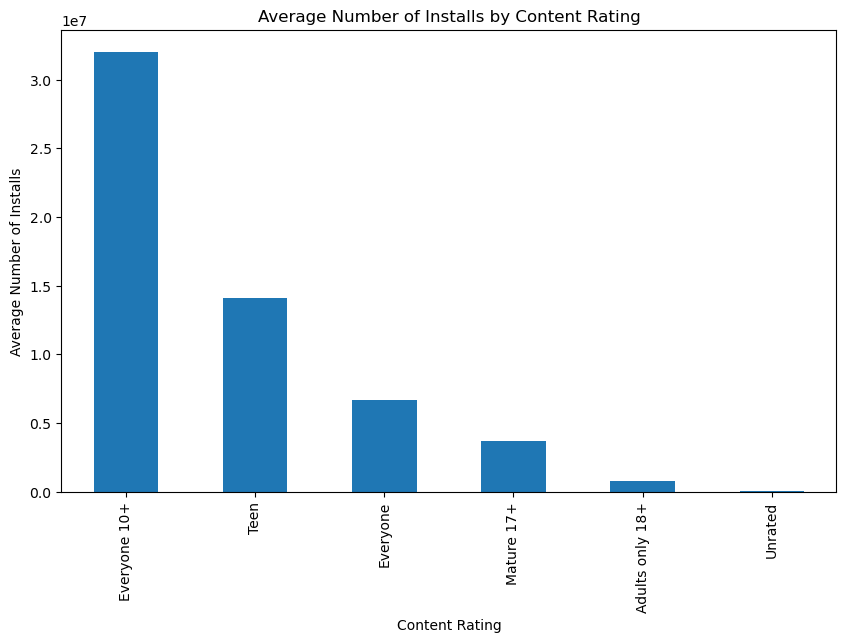

In [39]:
avg_installs_by_content_rating.plot(kind='bar', figsize=(10, 6))
plt.title('Average Number of Installs by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Average Number of Installs')
plt.show()

# Top paid apps by number of reviews

In [41]:
top_paid_apps_by_reviews = df[df['Type'] == 'Paid'].sort_values(by='Reviews', ascending=False).head(10)
print("Top 10 Paid Apps by Number of Reviews")
top_paid_apps_by_reviews[['App', 'Reviews']]

Top 10 Paid Apps by Number of Reviews


,App,Reviews
2759,Hitman Sniper,408292
5076,Grand Theft Auto: San Andreas,348962
6143,Bloons TD 5,190086
6723,Where's My Water?,188740
1610,Card Wars - Adventure Time,129603
3840,True Skate,129409
3935,Five Nights at Freddy's,100805
2364,Beautiful Widgets Pro,97890
4772,Beautiful Widgets Pro,97890
6104,DraStic DS Emulator,87766


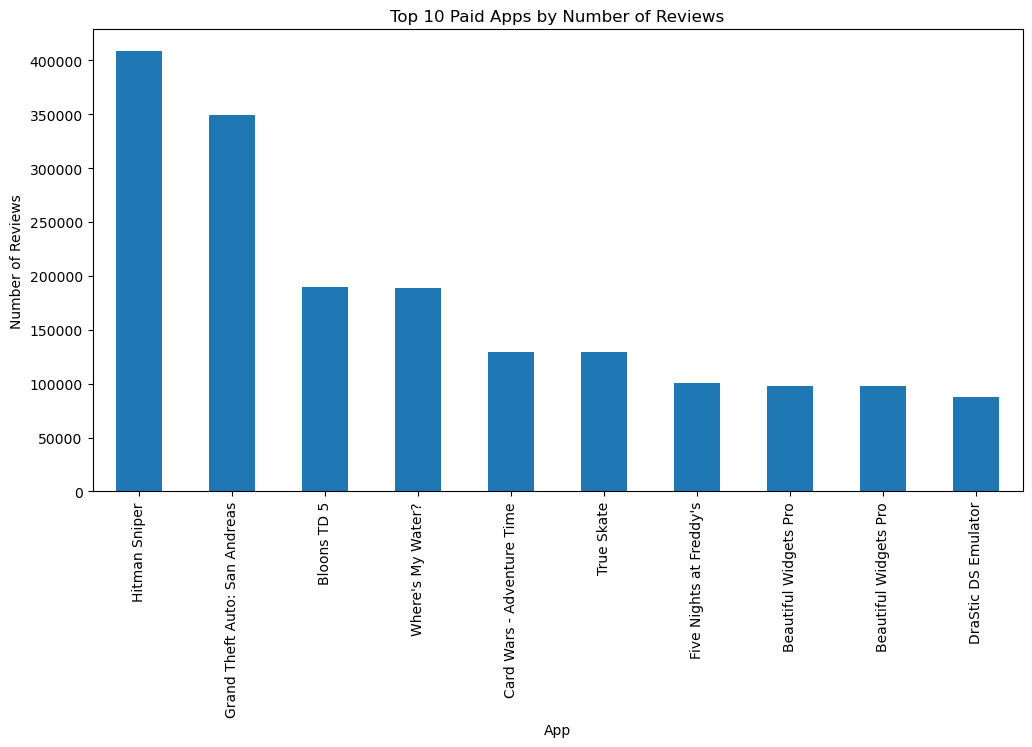

In [42]:
top_paid_apps_by_reviews.set_index('App')['Reviews'].plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Paid Apps by Number of Reviews')
plt.xlabel('App')
plt.ylabel('Number of Reviews')
plt.show()

# Distribution of minimum android version required

In [44]:
android_version_distribution = df['Android Ver'].value_counts()
print("Distribution of Minimum Android Version Required")
android_version_distribution.to_frame()

Distribution of Minimum Android Version Required


,count
Android Ver,
4.1 and up,1930
4.0.3 and up,1194
4.0 and up,1109
4.4 and up,806
2.3 and up,566
5.0 and up,490
4.2 and up,318
2.3.3 and up,235
3.0 and up,211


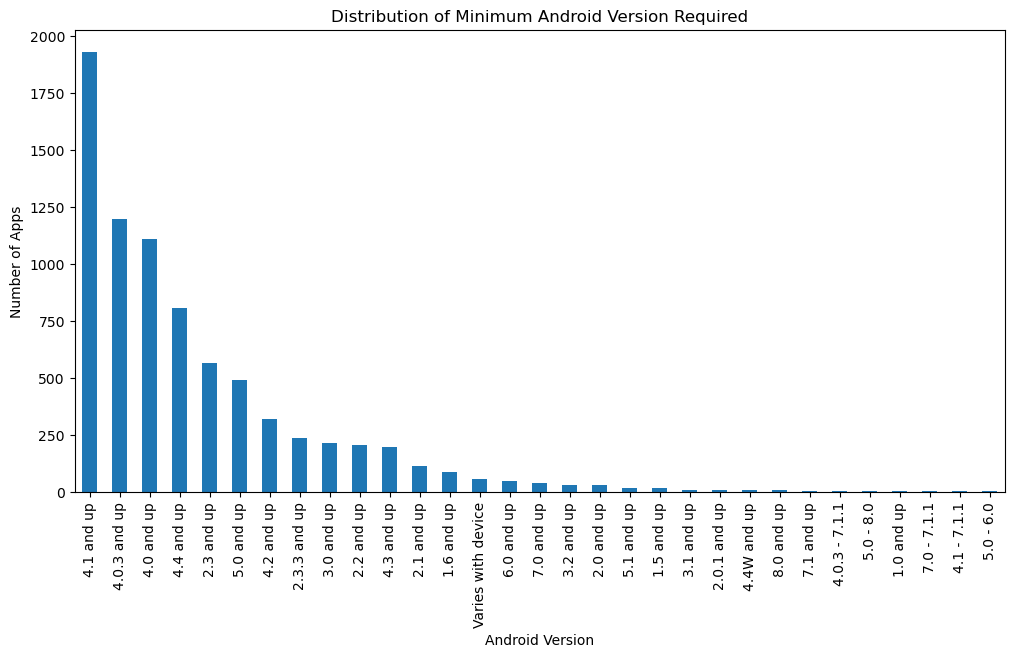

In [45]:
android_version_distribution.plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Minimum Android Version Required')
plt.xlabel('Android Version')
plt.ylabel('Number of Apps')
plt.show()

# Relationship between price and rating for paid apps

In [47]:
paid_apps = df[df['Price'] > 0]
correlation_price_rating = paid_apps[['Price', 'Rating']].corr()
print("Correlation between Price and Rating for Paid Apps")
print(correlation_price_rating)

Correlation between Price and Rating for Paid Apps
           Price    Rating
Price   1.000000 -0.112948
Rating -0.112948  1.000000


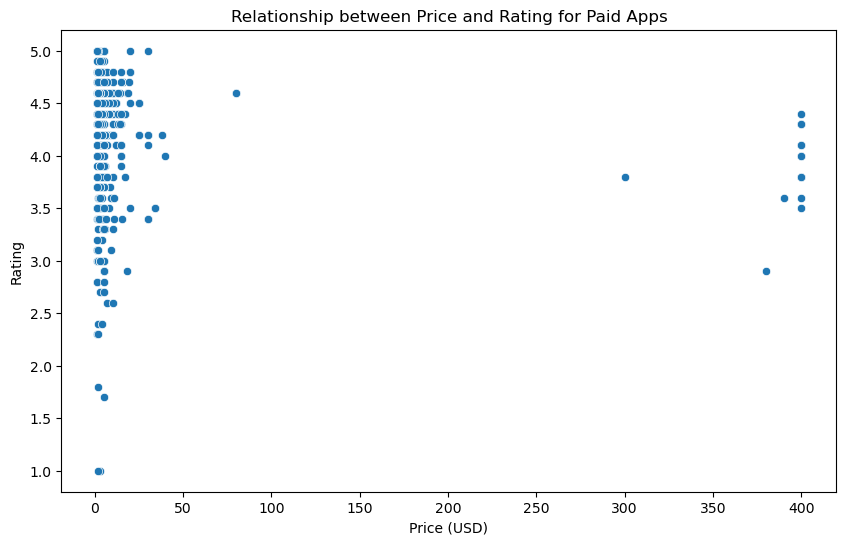

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating', data=paid_apps)
plt.title('Relationship between Price and Rating for Paid Apps')
plt.xlabel('Price (USD)')
plt.ylabel('Rating')
plt.show()

# Most Expensive Apps

In [50]:
most_expensive_apps = df[df['Price'] > 0].sort_values(by='Price', ascending=False).head(30)
print("Most Expensive Apps")
most_expensive_apps[['App', 'Price']]

Most Expensive Apps


,App,Price
3007,I'm Rich - Trump Edition,400.00
3729,I Am Rich Premium,399.99
3741,I am Rich,399.99
3724,I am rich,399.99
3727,I am Rich Plus,399.99
7543,I am rich(premium),399.99
3745,I AM RICH PRO PLUS,399.99
2876,most expensive app (H),399.99
3736,I am rich (Most expensive app),399.99
3734,I Am Rich Pro,399.99


C:\Users\kauna\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


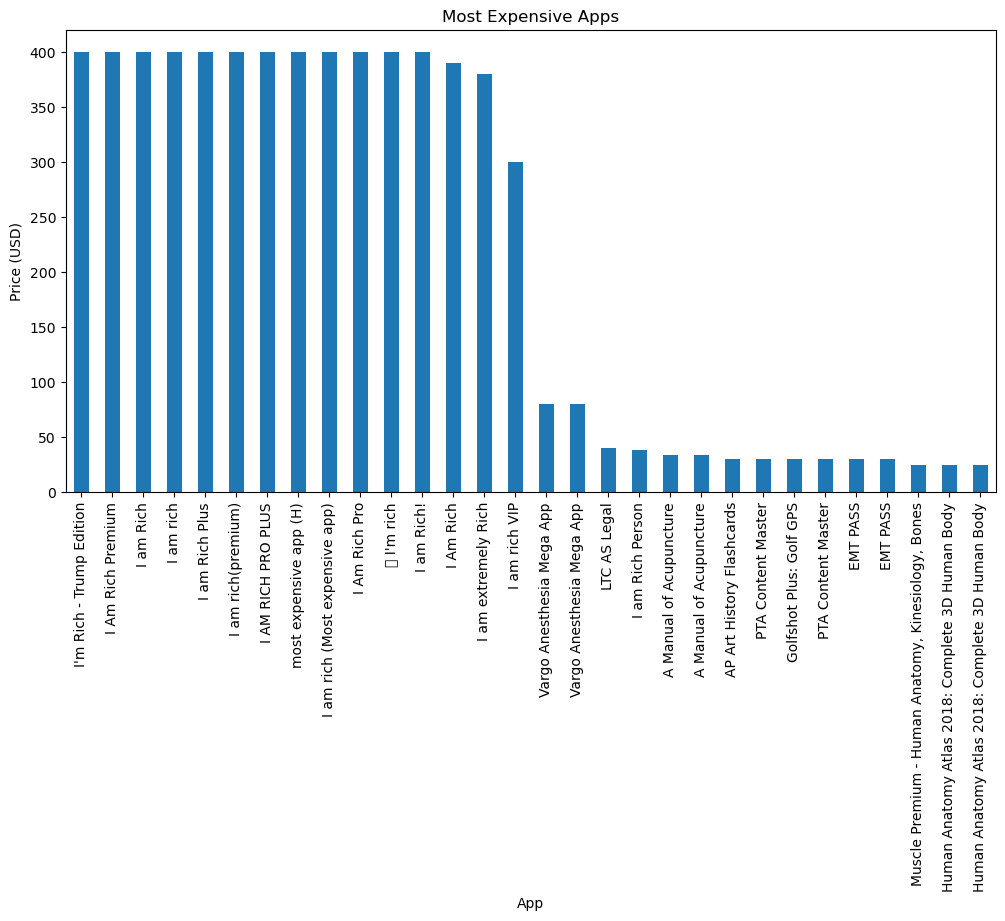

In [51]:
most_expensive_apps.set_index('App')['Price'].plot(kind='bar', figsize=(12, 6))
plt.title('Most Expensive Apps')
plt.xlabel('App')
plt.ylabel('Price (USD)')
plt.show()

# Average number of reviews by content rating

In [53]:
avg_reviews_by_content_rating = df.groupby('Content Rating')['Reviews'].mean().sort_values(ascending=False)
print("Average Number of Reviews by Content Rating")
avg_reviews_by_content_rating.to_frame()

Average Number of Reviews by Content Rating


,Reviews
Content Rating,
Everyone 10+,1.867879e+06
Teen,3.911225e+05
Everyone,2.101770e+05
Mature 17+,1.270562e+05
Adults only 18+,3.701100e+04
Unrated,1.186000e+03


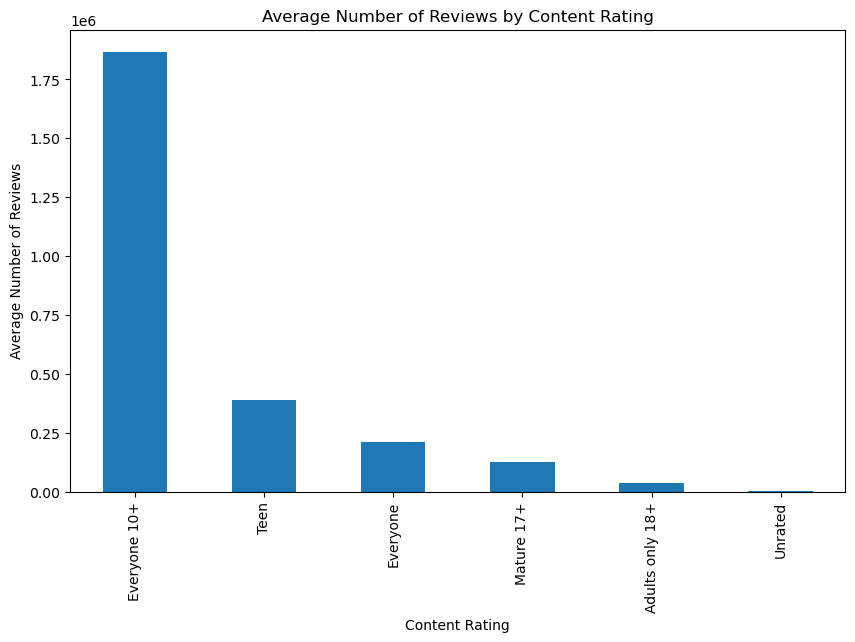

In [54]:
avg_reviews_by_content_rating.plot(kind='bar', figsize=(10, 6))
plt.title('Average Number of Reviews by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Average Number of Reviews')
plt.show()

# Apps with the most reviews

In [56]:
top_reviewed_apps = df.groupby('App')['Reviews'].sum().sort_values(ascending=False)
top_reviewed_apps = top_reviewed_apps.head(10)
print("Apps with the Most Reviews")
top_reviewed_apps.to_frame()

Apps with the Most Reviews


,Reviews
App,
Clash of Clans,179558781
Subway Surfers,166331958
Candy Crush Saga,156993136
8 Ball Pool,99386198
Clash Royale,92530298
UC Browser - Fast Download Private & Secure,53140694
Temple Run 2,48710930
Pou,41939801
ROBLOX,40038379


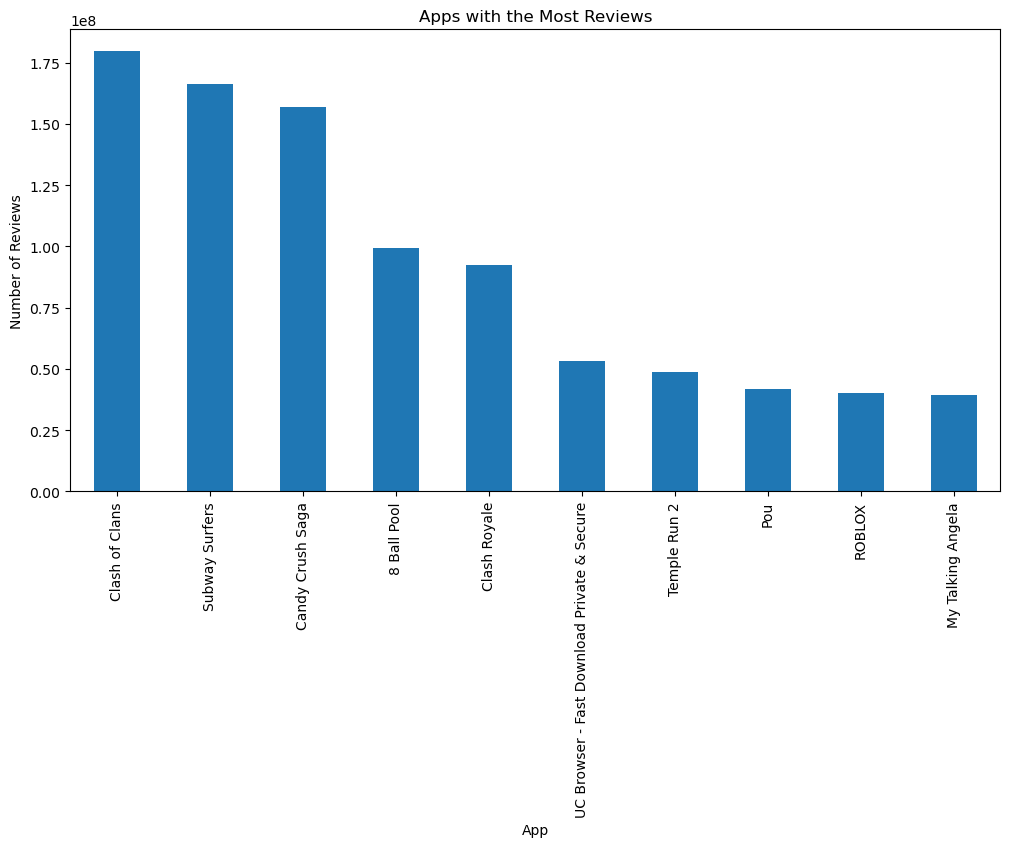

In [58]:
top_reviewed_apps.plot(kind='bar', figsize=(12, 6))
plt.title('Apps with the Most Reviews')
plt.xlabel('App')
plt.ylabel('Number of Reviews')
plt.show()

# Average size by category

In [63]:
avg_size_by_category = df.groupby('Category')['Size'].mean().sort_values(ascending=False)
print("Average App Size by Category")
avg_size_by_category.to_frame()

Average App Size by Category


,Size
Category,
GAME,45.340554
FAMILY,30.152628
SPORTS,26.506883
TRAVEL_AND_LOCAL,25.245000
HEALTH_AND_FITNESS,24.237668
FOOD_AND_DRINK,24.163095
ENTERTAINMENT,21.853333
PARENTING,21.579545
AUTO_AND_VEHICLES,21.541270


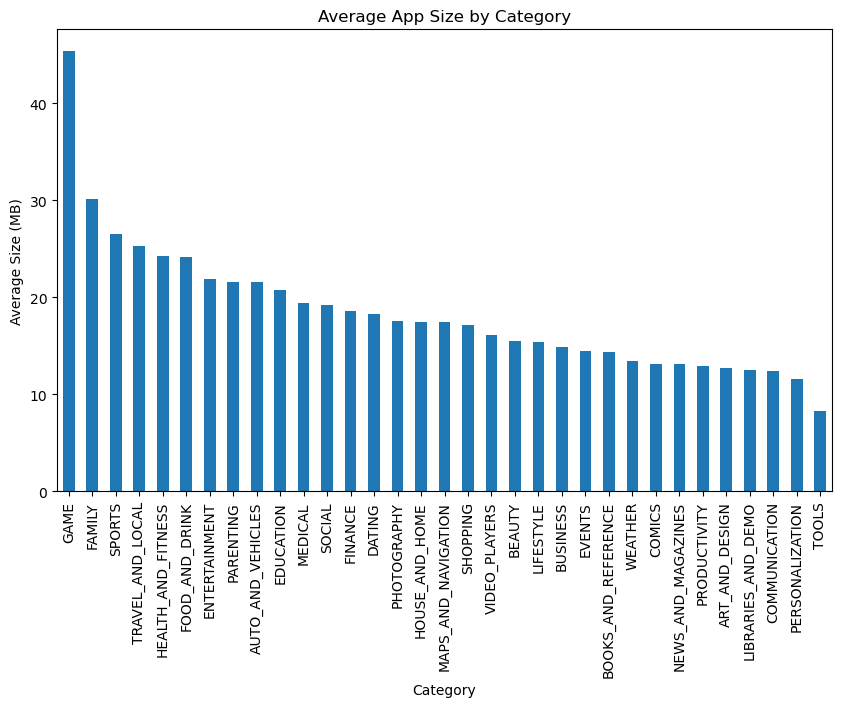

In [65]:
avg_size_by_category.plot(kind='bar', figsize=(10, 6))
plt.title('Average App Size by Category')
plt.xlabel('Category')
plt.ylabel('Average Size (MB)')
plt.show()

# Distribution of ratings for free vs. paid apps

In [68]:
rating_distribution_by_type = df.groupby('Type')['Rating'].value_counts().unstack().T
print("Distribution of Ratings for Free vs. Paid Apps")
rating_distribution_by_type

Distribution of Ratings for Free vs. Paid Apps


Type,Free,Paid
Rating,,
1.0,14.0,2.0
1.2,1.0,NaN
1.4,3.0,NaN
1.5,3.0,NaN
1.6,4.0,NaN
1.7,7.0,1.0
1.8,7.0,1.0
1.9,12.0,NaN
2.0,11.0,NaN


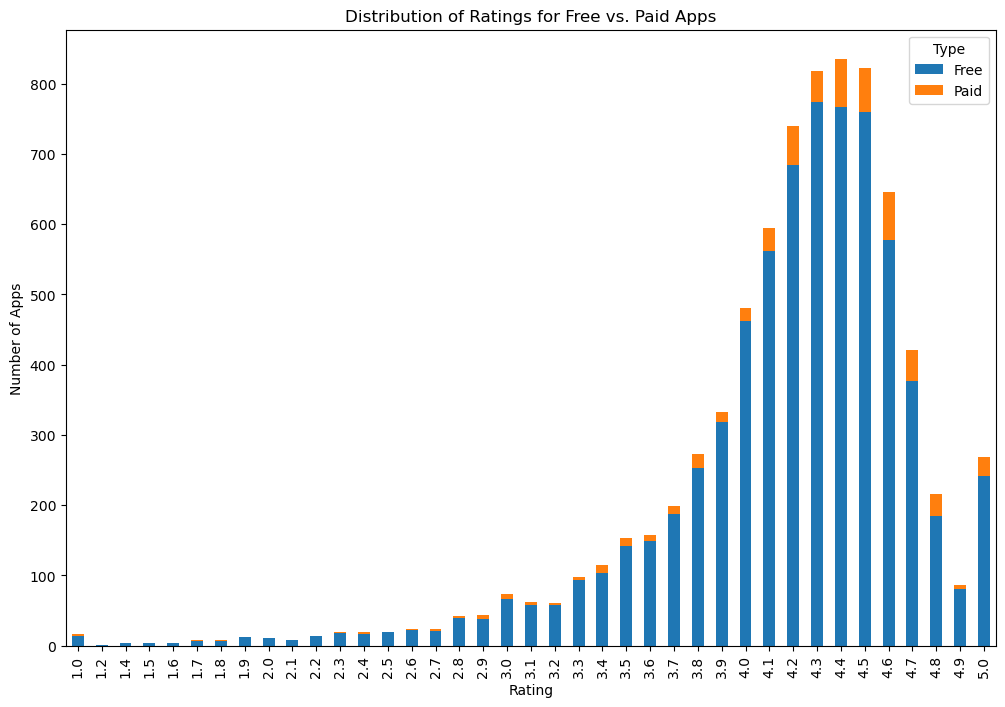

In [70]:
rating_distribution_by_type.plot(kind='bar', figsize=(12, 8), stacked=True)
plt.title('Distribution of Ratings for Free vs. Paid Apps')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.show()

# Average number of installs by genre

In [73]:
avg_installs_by_genre = df.groupby('Genres')['Installs'].mean().sort_values(ascending=False).head(10)
print("Average Number of Installs by Genre")
avg_installs_by_genre.to_frame()

Average Number of Installs by Genre


,Installs
Genres,
Adventure;Action & Adventure,6.970385e+07
Arcade,5.288214e+07
Casual,4.747174e+07
Puzzle;Action & Adventure,3.102000e+07
Educational;Action & Adventure,2.526250e+07
News & Magazines,2.515917e+07
Communication,2.342140e+07
Action,2.305881e+07
Racing,2.026080e+07


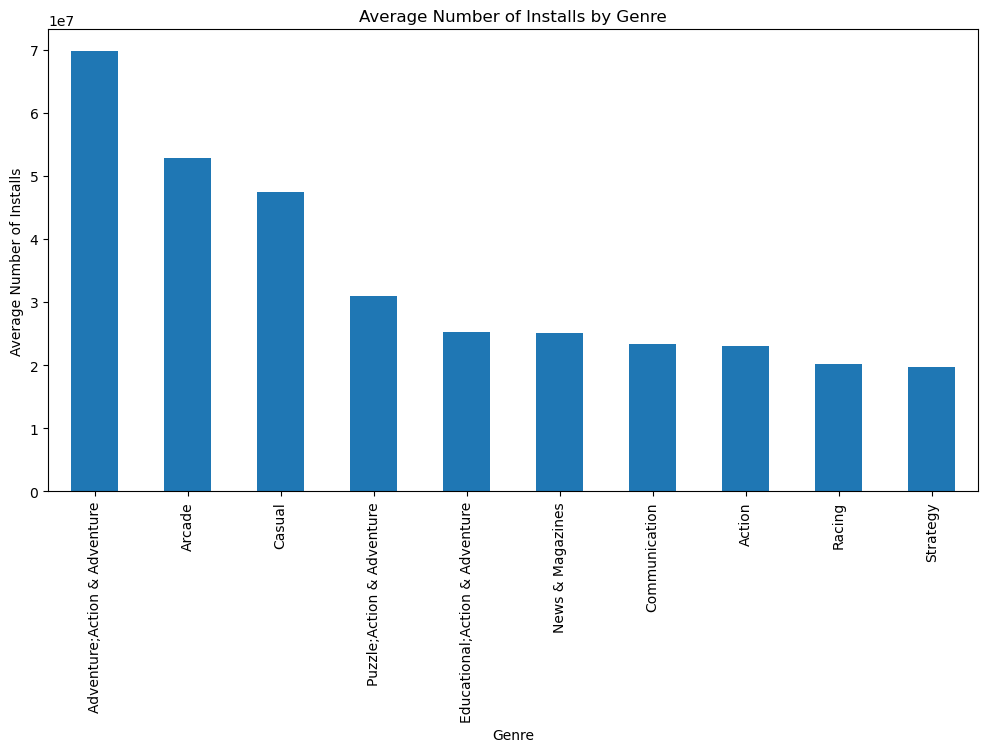

In [75]:
avg_installs_by_genre.plot(kind='bar', figsize=(12, 6))
plt.title('Average Number of Installs by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Number of Installs')
plt.show()

# Average price by category for paid apps

In [85]:
avg_price_by_category = df[df['Type'] == 'Paid'].groupby('Category')['Price'].mean().sort_values(ascending=False)
print("Average Price by Category for Paid Apps")
avg_price_by_category.to_frame()

Average Price by Category for Paid Apps


,Price
Category,
FINANCE,187.682308
LIFESTYLE,122.087500
FAMILY,14.883113
MEDICAL,12.785128
DATING,7.490000
BUSINESS,6.140000
PHOTOGRAPHY,5.223333
PARENTING,4.990000
FOOD_AND_DRINK,4.990000


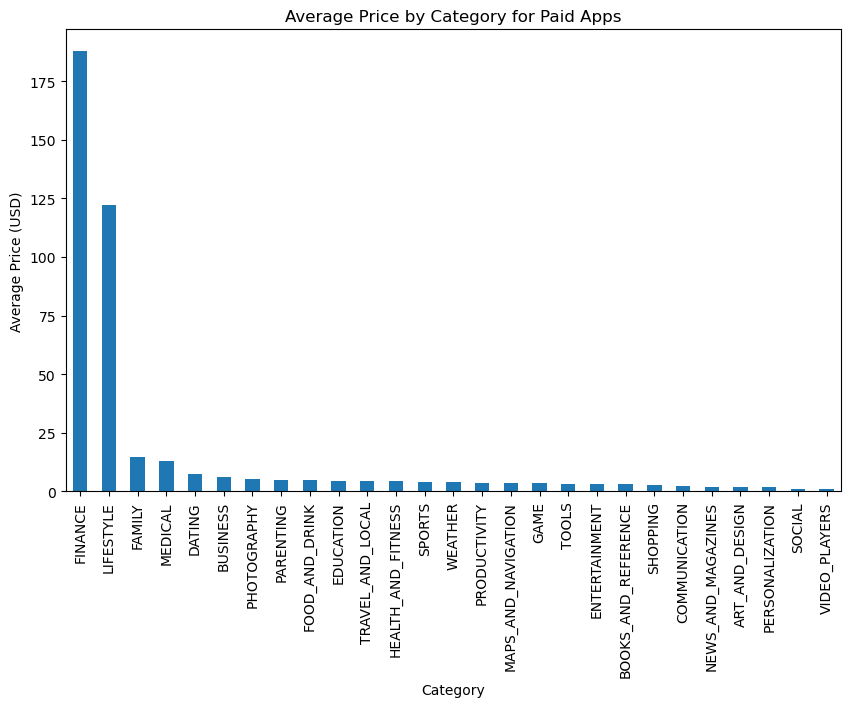

In [87]:
avg_price_by_category.plot(kind='bar', figsize=(10, 6))
plt.title('Average Price by Category for Paid Apps')
plt.xlabel('Category')
plt.ylabel('Average Price (USD)')
plt.show()

# Relationship between number of reviews and installs

In [90]:
correlation_reviews_installs = df[['Reviews', 'Installs']].corr()
print("Correlation between Number of Reviews and Installs")
print(correlation_reviews_installs)

Correlation between Number of Reviews and Installs
           Reviews  Installs
Reviews   1.000000  0.626195
Installs  0.626195  1.000000


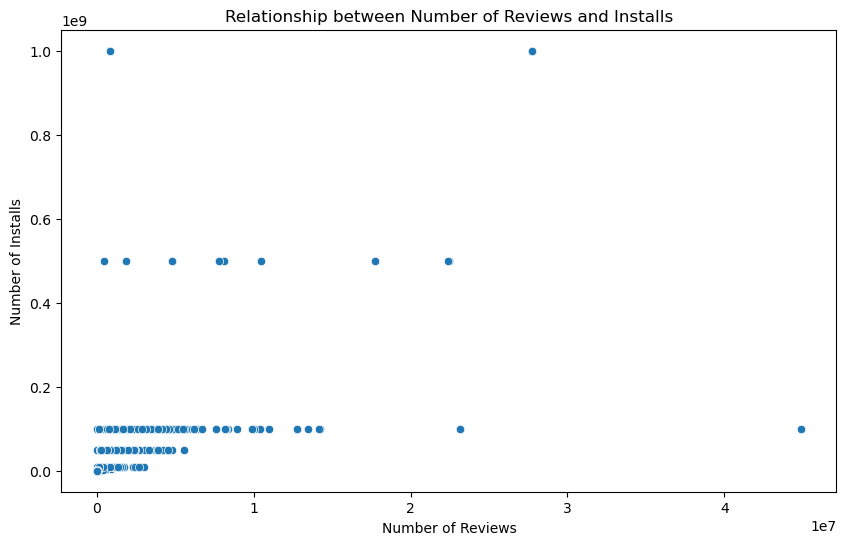

In [92]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reviews', y='Installs', data=df)
plt.title('Relationship between Number of Reviews and Installs')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Installs')
plt.show()

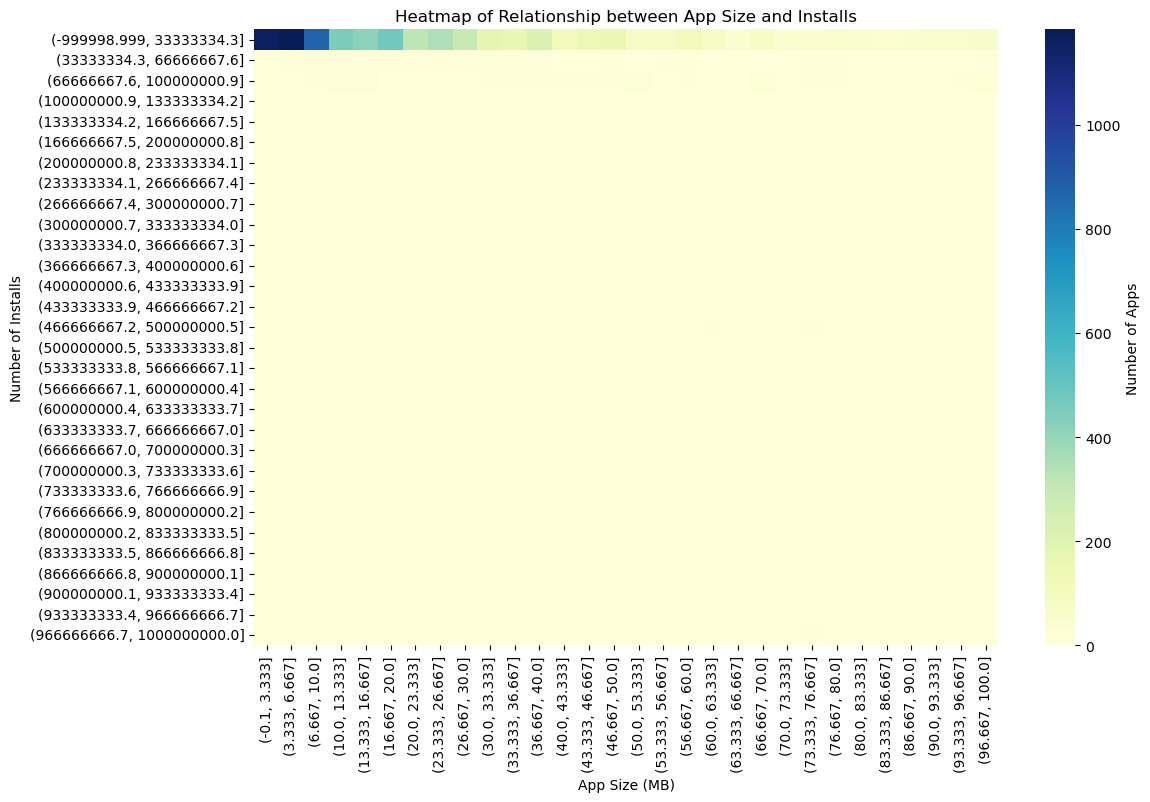

In [96]:
size_bins = pd.cut(df['Size'], bins=30)
installs_bins = pd.cut(df['Installs'], bins=30)
heatmap_data = pd.pivot_table(df, index=installs_bins, columns=size_bins, aggfunc='size', fill_value=0, observed=False)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Number of Apps'})
plt.title('Heatmap of Relationship between App Size and Installs')
plt.xlabel('App Size (MB)')
plt.ylabel('Number of Installs')
plt.show()

# Average rating by genre

In [99]:
avg_rating_by_genre = df.groupby('Genres')['Rating'].mean().sort_values(ascending=False).head(10)
print("Average Rating by Genre")
avg_rating_by_genre.to_frame()

Average Rating by Genre


,Rating
Genres,
Board;Pretend Play,4.800000
Comics;Creativity,4.800000
Health & Fitness;Education,4.700000
Entertainment;Creativity,4.650000
Strategy;Action & Adventure,4.600000
Adventure;Brain Games,4.600000
Puzzle;Education,4.600000
Music;Music & Video,4.533333
Strategy;Education,4.500000


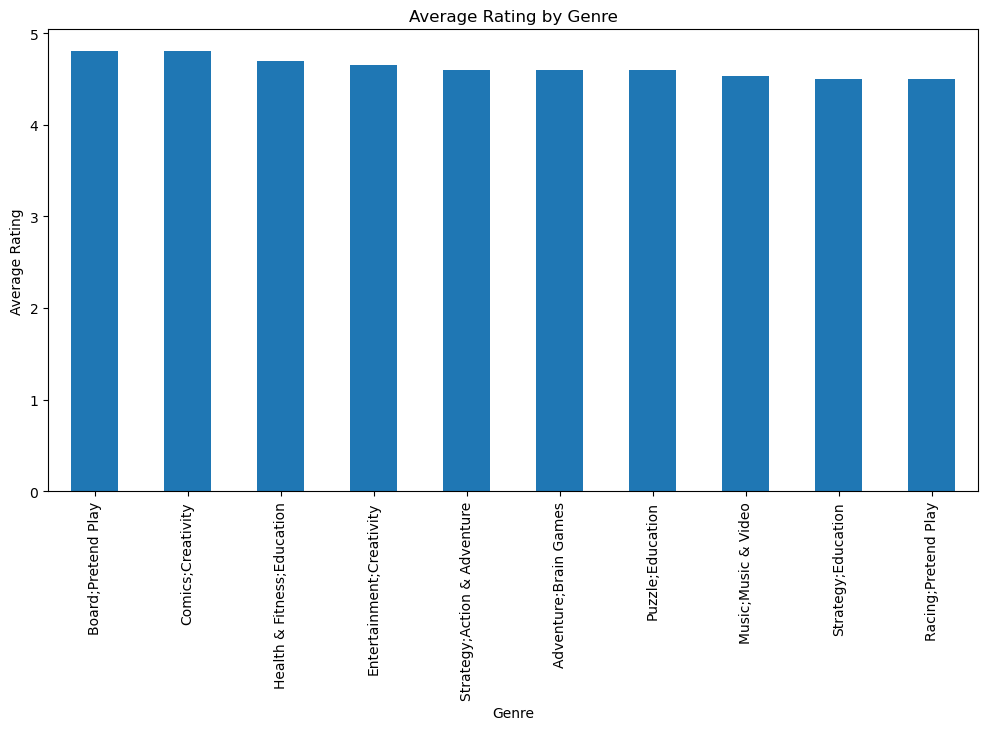

In [101]:
avg_rating_by_genre.plot(kind='bar', figsize=(12, 6))
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

# Distribution of apps by content rating across categories

In [104]:
content_rating_distribution = df.pivot_table(index='Category', columns='Content Rating', aggfunc='size', fill_value=0)
print("Distribution of Apps by Content Rating Across Categories")
content_rating_distribution

Distribution of Apps by Content Rating Across Categories


Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Category,,,,,,
ART_AND_DESIGN,0,55,1,0,3,0
AUTO_AND_VEHICLES,0,61,1,0,1,0
BEAUTY,0,34,0,1,2,0
BOOKS_AND_REFERENCE,0,130,5,2,7,0
BUSINESS,0,242,0,0,4,0
COMICS,1,23,2,6,17,0
COMMUNICATION,0,187,0,5,19,0
DATING,0,10,0,157,6,0
EDUCATION,0,99,8,2,1,0


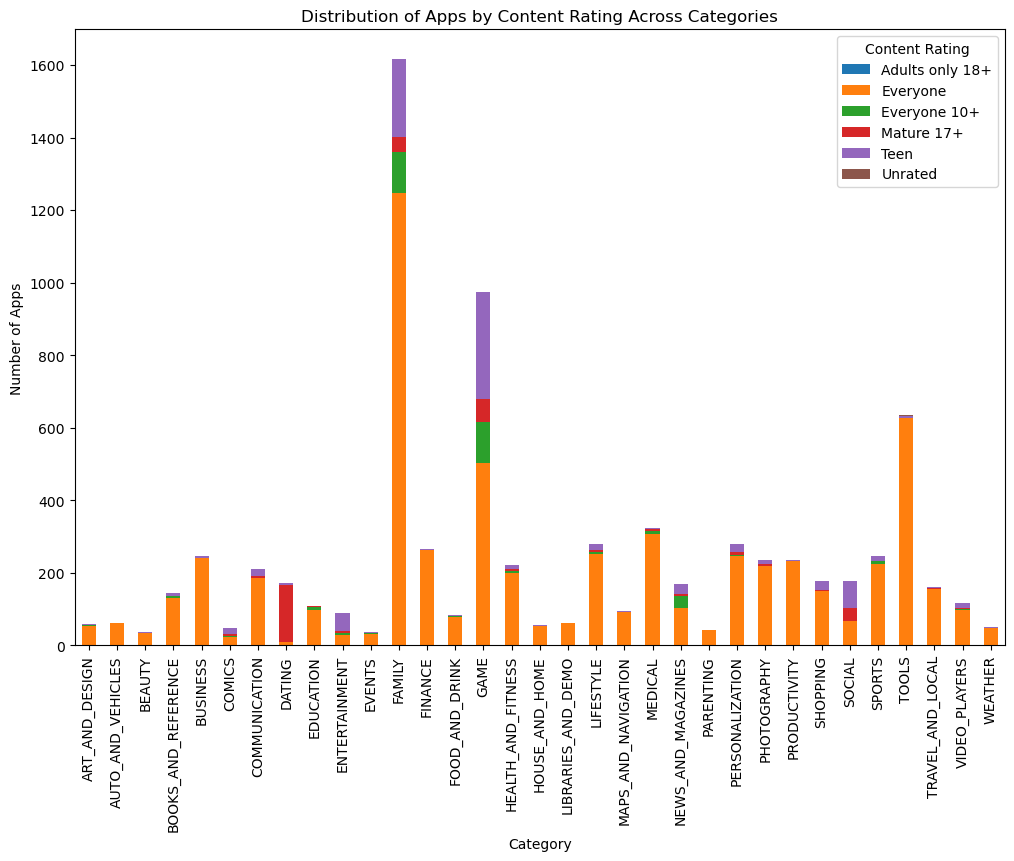

In [106]:
content_rating_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Apps by Content Rating Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.show()

# Number of Paid Apps by Category

In [114]:
paid_apps_by_category = df[df['Type'] == 'Paid']['Category'].value_counts().sort_values(ascending=False)
print("Number of Paid Apps by Category")
paid_apps_by_category.to_frame()

Number of Paid Apps by Category


,count
Category,
FAMILY,151
MEDICAL,78
GAME,75
PERSONALIZATION,64
TOOLS,55
SPORTS,20
COMMUNICATION,18
LIFESTYLE,16
PHOTOGRAPHY,15


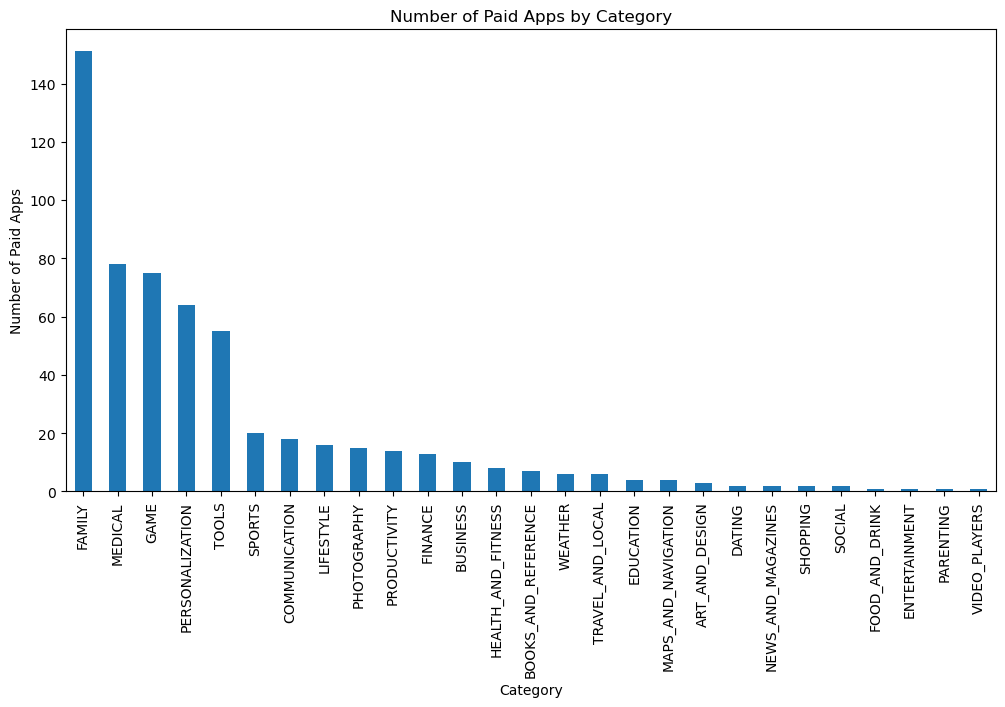

In [118]:
paid_apps_by_category.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Paid Apps by Category')
plt.xlabel('Category')
plt.ylabel('Number of Paid Apps')
plt.show()

# Number of apps by Android version requirement

In [121]:
apps_by_android_version = df['Android Ver'].value_counts().sort_values(ascending=False)
print("Number of Apps by Android Version Requirement")
apps_by_android_version.to_frame()

Number of Apps by Android Version Requirement


,count
Android Ver,
4.1 and up,1930
4.0.3 and up,1194
4.0 and up,1109
4.4 and up,806
2.3 and up,566
5.0 and up,490
4.2 and up,318
2.3.3 and up,235
3.0 and up,211


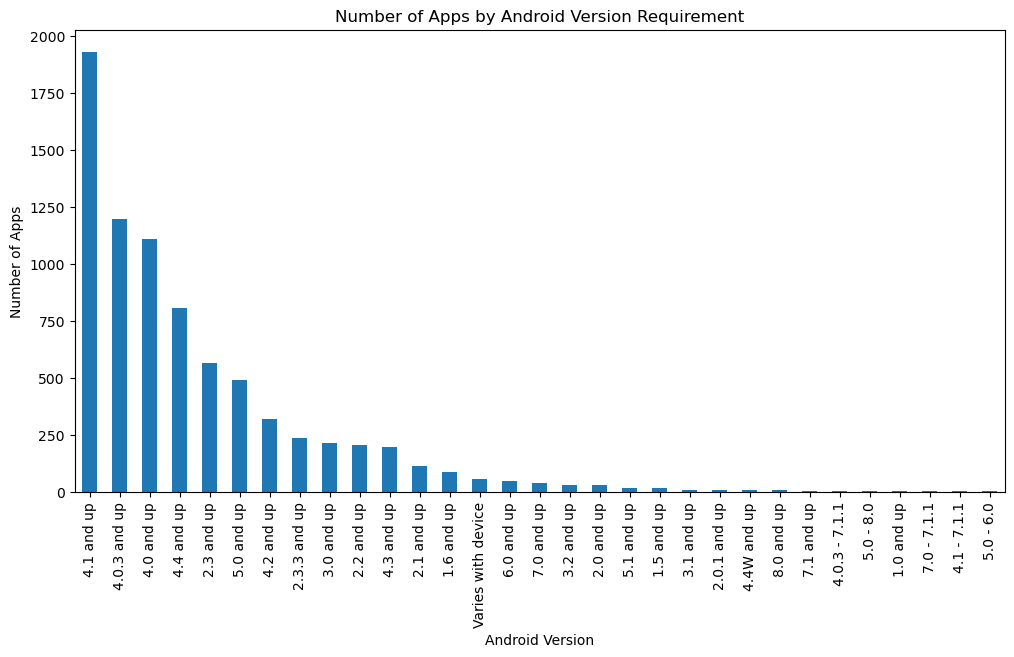

In [123]:
apps_by_android_version.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Apps by Android Version Requirement')
plt.xlabel('Android Version')
plt.ylabel('Number of Apps')
plt.show()

# Relationship between app price and number of installs for paid apps

In [126]:
correlation_price_installs_paid = paid_apps[['Price', 'Installs']].corr()
print("Correlation Between Price and Number of Installs for Paid Apps")
print(correlation_price_installs_paid)

Correlation Between Price and Number of Installs for Paid Apps
            Price  Installs
Price     1.00000  -0.02985
Installs -0.02985   1.00000


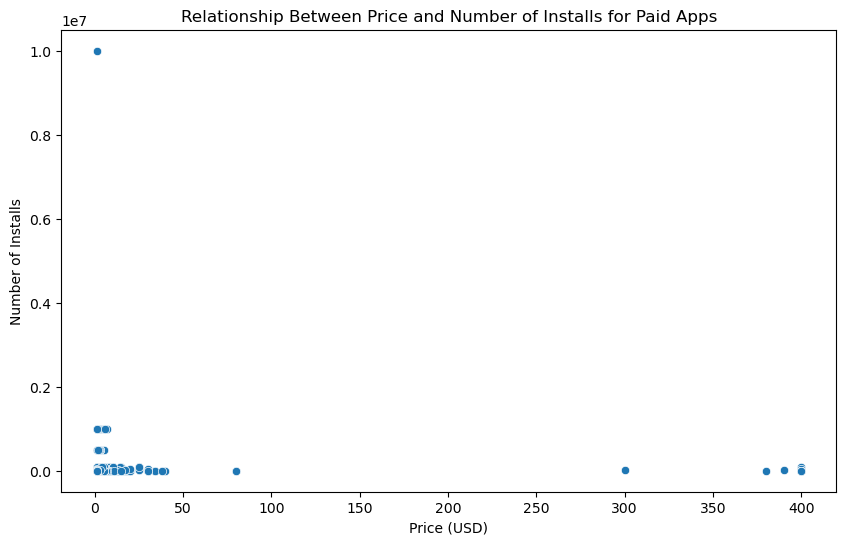

In [128]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Installs', data=paid_apps)
plt.title('Relationship Between Price and Number of Installs for Paid Apps')
plt.xlabel('Price (USD)')
plt.ylabel('Number of Installs')
plt.show()

# Most popular apps by content rating

In [131]:
popular_apps_by_content_rating = df.groupby('Content Rating')['Installs'].sum().sort_values(ascending=False)
print("Most Popular Apps by Content Rating")
popular_apps_by_content_rating.to_frame()

Most Popular Apps by Content Rating


,Installs
Content Rating,
Everyone,41241698068
Teen,12258146110
Everyone 10+,10187045210
Mature 17+,1372222930
Adults only 18+,1500000
Unrated,50000


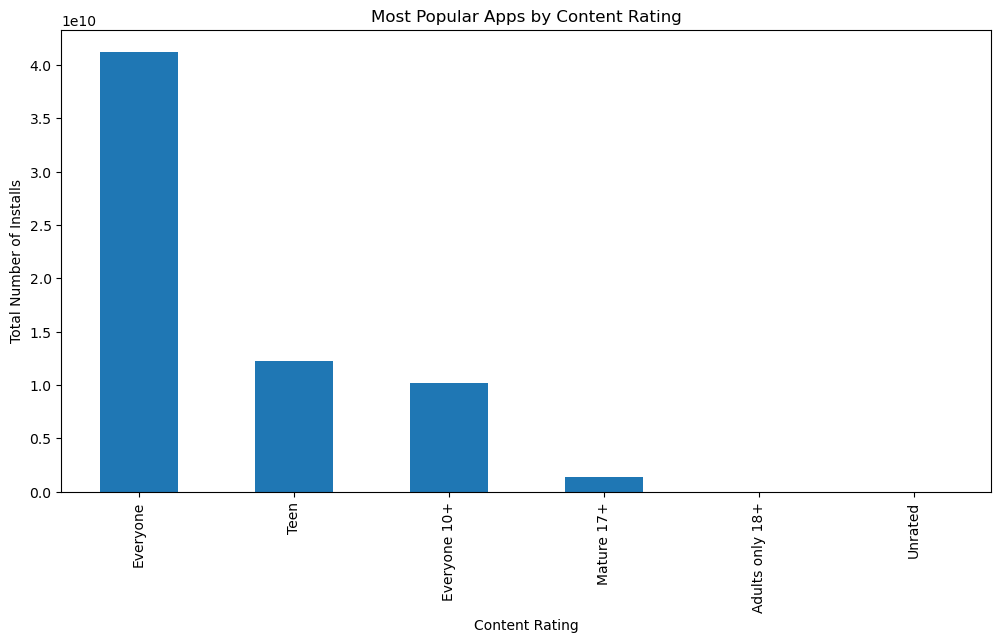

In [133]:
popular_apps_by_content_rating.plot(kind='bar', figsize=(12, 6))
plt.title('Most Popular Apps by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Total Number of Installs')
plt.show()

# Top 20 Apps with the Highest Ratings

In [139]:
highest_rated_apps = df.sort_values(by='Rating', ascending=False).head(20)
print("Top 10 Apps with the Highest Ratings")
highest_rated_apps[['App', 'Rating']]

Top 10 Apps with the Highest Ratings


,App,Rating
5123,CK Employee Portal,5.0
1779,Basics of Orthopaedics,5.0
4915,CB Fit,5.0
7428,Monster Ride Pro,5.0
4901,CA Speakers,5.0
7214,FH School,5.0
1776,NCLEX Multi-topic Nursing Exam Review-Quiz & n...,5.0
2695,ADS-B Driver,5.0
4858,420 BZ Budeze Delivery,5.0
7210,Jigsaw Volvo FH 16 Trucks,5.0


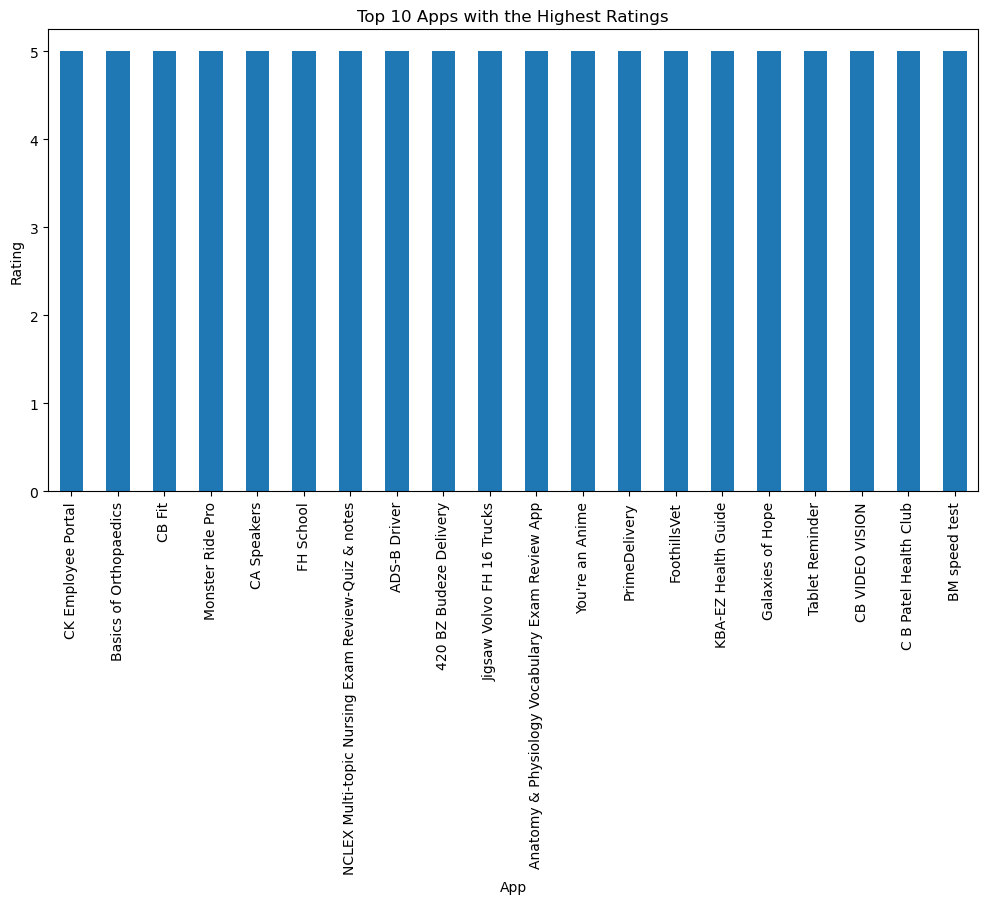

In [141]:
highest_rated_apps.set_index('App')['Rating'].plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Apps with the Highest Ratings')
plt.xlabel('App')
plt.ylabel('Rating')
plt.show()

# Distribution of app prices

In [144]:
price_distribution = df[df['Price'] > 0]['Price'].value_counts().sort_index()
print("Distribution of App Prices")
price_distribution.to_frame()

Distribution of App Prices


,count
Price,
0.99,106
1.00,2
1.20,1
1.29,1
1.49,28
...,...
299.99,1
379.99,1
389.99,1


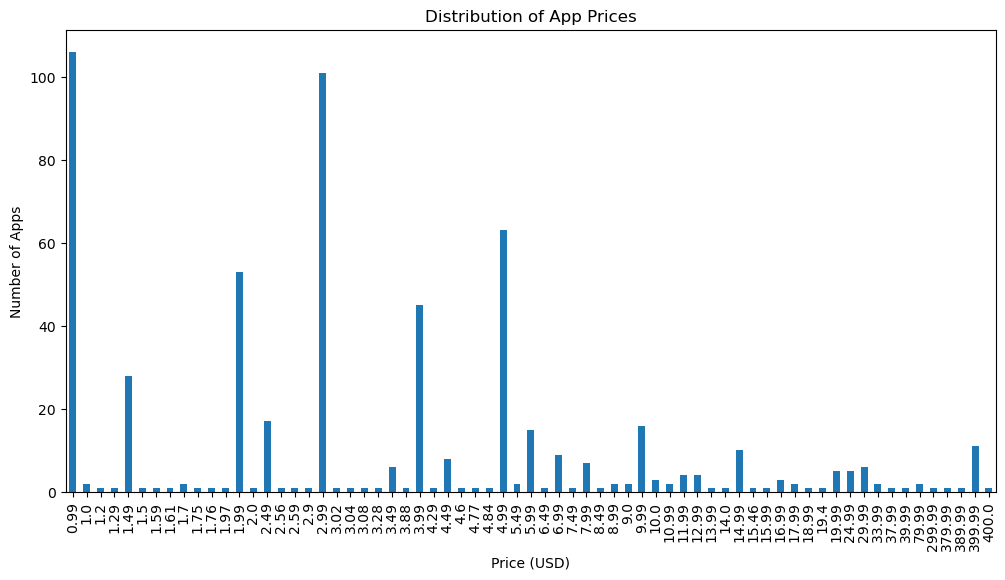

In [146]:
price_distribution.plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of App Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Number of Apps')
plt.show()